In [26]:
import sys
import os
import numpy as np
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path + "/src/simulations_v2")
from multiparam_output_loader import MultiParamOutputLoader

## Nominal Parameters (june8params/nominal.yaml)
Varying Population Size and testing frequency

In [27]:
sensitivity_output = MultiParamOutputLoader("/nfs01/covid_sims/1594156171-multiparam/")

/home/aaj54/group-testing/src/simulations_v2/multiparam_output_loader.py:60: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  param_specifier = yaml.load(f)


In [28]:
sensitivity_output.sim_results['Nominal Parameters'].keys()

dict_keys([(100.0, 0.1), (100.0, 0.2), (100.0, 0.33), (100.0, 0.5), (100.0, 0.75), (100.0, 1.0), (500.0, 0.1), (500.0, 0.2), (500.0, 0.33), (500.0, 0.5), (500.0, 0.75), (500.0, 1.0), (1000.0, 0.1), (1000.0, 0.2), (1000.0, 0.33), (1000.0, 0.5), (1000.0, 0.75), (1000.0, 1.0), (5000.0, 0.1), (5000.0, 0.2), (5000.0, 0.33), (5000.0, 0.5), (5000.0, 0.75), (5000.0, 1.0), (10000.0, 0.1), (10000.0, 0.2), (10000.0, 0.33), (10000.0, 0.5), (10000.0, 0.75), (10000.0, 1.0), (15000.0, 0.1), (15000.0, 0.2), (15000.0, 0.33), (15000.0, 0.5), (15000.0, 0.75), (15000.0, 1.0), (20000.0, 0.1), (20000.0, 0.2), (20000.0, 0.33), (20000.0, 0.5), (20000.0, 0.75), (20000.0, 1.0), (25000.0, 0.1), (25000.0, 0.2), (25000.0, 0.33), (25000.0, 0.5), (25000.0, 0.75), (25000.0, 1.0), (30000.0, 0.1), (30000.0, 0.2), (30000.0, 0.33), (30000.0, 0.5), (30000.0, 0.75), (30000.0, 1.0), (34310.0, 0.1), (34310.0, 0.2), (34310.0, 0.33), (34310.0, 0.5), (34310.0, 0.75), (34310.0, 1.0)])

In [29]:
keys = sensitivity_output.sim_results['Nominal Parameters'].keys()
X_popsize = sorted(list(set([x[0] for x in keys])))
Y_testfrac = sorted(list(set([x[1] for x in keys])))

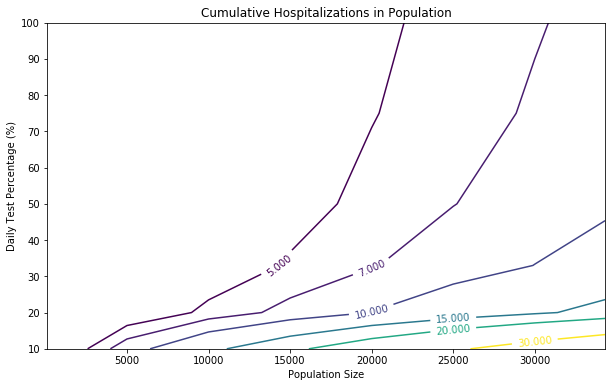

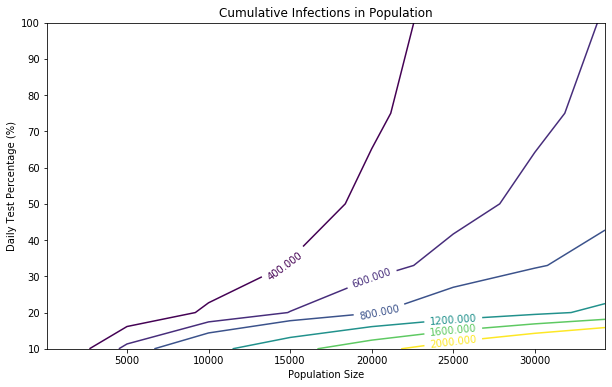

In [30]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

def get_cum_hosp(df):
    return df[['severity_3', 'severity_2']].iloc[df.shape[0] - 1].sum()

def get_cum_outside_infections(df):
    return df['cumulative_outside_infections'].iloc[df.shape[0] - 1].sum()

def get_cum_infections(df):
    return df[['cumulative_mild', 'cumulative_severe']].iloc[df.shape[0] - 1].sum()

def get_median_data(dfs):
    hosps = np.quantile([get_cum_hosp(df) for df in dfs], 0.5)
    outside_infs = np.quantile([get_cum_outside_infections(df) for df in dfs], 0.5)
    infs = np.quantile([get_cum_infections(df) for df in dfs], 0.5)
    return hosps, outside_infs, infs



Zs_hosp = []
Zs_outside_inf = []
Zs_inf = []
for popsize in X_popsize:
    
    Z_hosp = []
    Z_outside_inf = []
    Z_inf = []
    for testfrac in Y_testfrac:
#for (contacts, popsize), dfs in sensitivity_output.sim_results['Nominal Student Parameters'].items():
        dfs = sensitivity_output.sim_results['Nominal Parameters'][(popsize, testfrac)]
        hosps, outside_infs, infs = get_median_data(dfs)
        Z_hosp.append(hosps)
        Z_outside_inf.append(outside_infs)
        Z_inf.append(infs)
    Zs_hosp.append(Z_hosp)
    Zs_outside_inf.append(Z_outside_inf)
    Zs_inf.append(Z_inf)

plt.figure(figsize=(10,6))
plt.title("Cumulative Hospitalizations in Population")
plt.ylabel("Daily Test Percentage (%)")
plt.xlabel("Population Size")
CS = plt.contour(np.array(X_popsize), np.array(Y_testfrac) * 100, np.array(Zs_hosp).T, [5,7,10,15,20,30])
# pop_levels = [0.00025, 0.0005, 0.00075, 0.001, 0.0025, 0.005]
# pop_labels = dict()
# for level in pop_levels:
#     pop_labels[level] = str(level*100) + '%'
# CS = plt.contour(np.array(X_popsize), np.array(Y_testfrac) * 100, np.array(Zs_hosp).T/34310, pop_levels)
# plt.clabel(CS, fmt=pop_labels, inline=1, fontsize=10)
plt.clabel(CS, inline=1, fontsize=10)
plt.show()


# inf_levels = [0.025, 0.05, 0.1, 0.2, 0.3, 0.5]
# inf_labels = dict()
# for level in inf_levels:
#     inf_labels[level] = str(level*100) + '%'
    
plt.figure(figsize=(10,6))
plt.title("Cumulative Infections in Population")
plt.ylabel("Daily Test Percentage (%)")
plt.xlabel("Population Size")
CS = plt.contour(np.array(X_popsize), np.array(Y_testfrac) * 100, np.array(Zs_inf).T, [400,600,800,1200,1600,2000])
# CS = plt.contour(np.array(X_popsize), np.array(Y_testfrac) * 100, np.array(Zs_inf).T/34310, inf_levels)
# plt.clabel(CS, fmt=inf_labels, inline=1, fontsize=10)
plt.clabel(CS, inline=1, fontsize=10)
plt.show()

# July 11 Figures

## Nominal Parameters Reopen (june8params/nominal.yaml)

In [51]:
sensitivity_output = MultiParamOutputLoader("/nfs01/covid_sims/1594503934-multiparam/")

In [52]:
sensitivity_output.sim_results['Nominal Parameters'].keys()

dict_keys([(1.0, 0.01), (5.0, 0.01), (10.0, 0.01), (15.0, 0.01), (20.0, 0.01), (25.0, 0.01), (30.0, 0.01), (35.0, 0.01), (40.0, 0.01), (1.0, 0.05), (5.0, 0.05), (10.0, 0.05), (15.0, 0.05), (20.0, 0.05), (25.0, 0.05), (30.0, 0.05), (35.0, 0.05), (40.0, 0.05), (1.0, 0.1), (5.0, 0.1), (10.0, 0.1), (15.0, 0.1), (20.0, 0.1), (25.0, 0.1), (30.0, 0.1), (35.0, 0.1), (40.0, 0.1), (1.0, 0.2), (5.0, 0.2), (10.0, 0.2), (15.0, 0.2), (20.0, 0.2), (25.0, 0.2), (30.0, 0.2), (35.0, 0.2), (40.0, 0.2), (1.0, 0.25), (5.0, 0.25), (10.0, 0.25), (15.0, 0.25), (20.0, 0.25), (25.0, 0.25), (30.0, 0.25), (35.0, 0.25), (40.0, 0.25), (1.0, 0.33), (5.0, 0.33), (10.0, 0.33), (15.0, 0.33), (20.0, 0.33), (25.0, 0.33), (30.0, 0.33), (35.0, 0.33), (40.0, 0.33), (1.0, 0.5), (5.0, 0.5), (10.0, 0.5), (15.0, 0.5), (20.0, 0.5), (25.0, 0.5), (30.0, 0.5), (35.0, 0.5), (40.0, 0.5), (1.0, 0.65), (5.0, 0.65), (10.0, 0.65), (15.0, 0.65), (20.0, 0.65), (25.0, 0.65), (30.0, 0.65), (35.0, 0.65), (40.0, 0.65), (1.0, 0.8), (5.0, 0.8), 

In [53]:
keys = sensitivity_output.sim_results['Nominal Parameters'].keys()
X_contacts = sorted(list(set([x[0] for x in keys])))
Y_testfrac = sorted(list(set([x[1] for x in keys])))

In [57]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

def get_cum_hosp(df):
    return df[['severity_3', 'severity_2']].iloc[df.shape[0] - 1].sum()

def get_cum_outside_infections(df):
    return df['cumulative_outside_infections'].iloc[df.shape[0] - 1].sum()

def get_cum_infections(df):
    return df[['cumulative_mild', 'cumulative_severe']].iloc[df.shape[0] - 1].sum()

def get_median_data(dfs):
    hosps = np.quantile([get_cum_hosp(df) for df in dfs], 0.5)
    outside_infs = np.quantile([get_cum_outside_infections(df) for df in dfs], 0.5)
    infs = np.quantile([get_cum_infections(df) for df in dfs], 0.5)
    return hosps, outside_infs, infs



Zs_hosp = []
Zs_outside_inf = []
Zs_inf = []
for contacts in X_contacts:
    
    Z_hosp = []
    Z_outside_inf = []
    Z_inf = []
    for testfrac in Y_testfrac:
#for (contacts, popsize), dfs in sensitivity_output.sim_results['Nominal Student Parameters'].items():
        dfs = sensitivity_output.sim_results['Nominal Parameters'][(contacts, testfrac)]
        hosps, outside_infs, infs = get_median_data(dfs)
#         hosps = [hosp + 12.47 for hosp in hosps]
#         infs = [inf + 588.54 for inf in infs]
#         print(hosps, outside_infs, infs)
        Z_hosp.append(hosps)
        Z_outside_inf.append(outside_infs)
        Z_inf.append(infs)
    Zs_hosp.append(Z_hosp)
    Zs_outside_inf.append(Z_outside_inf)
    Zs_inf.append(Z_inf)

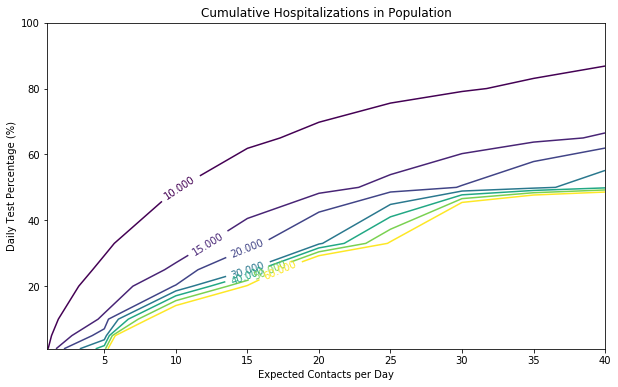

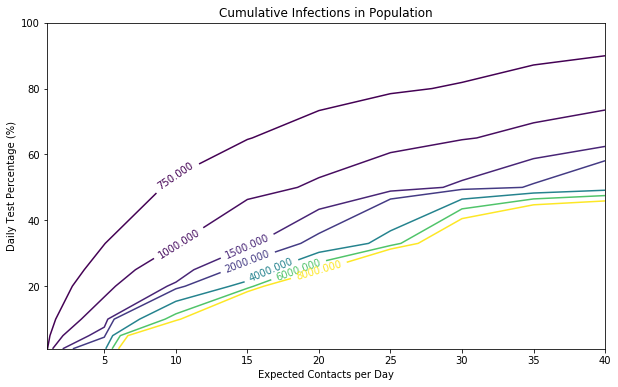

In [60]:
plt.figure(figsize=(10,6))
plt.title("Cumulative Hospitalizations in Population")
plt.ylabel("Daily Test Percentage (%)")
plt.xlabel("Expected Contacts per Day")
# CS = plt.contour(np.array(X_contacts), np.array(Y_testfrac) * 100, np.array(Zs_hosp).T, 8)
CS = plt.contour(np.array(X_contacts), np.array(Y_testfrac) * 100, np.array(Zs_hosp).T, [10,15,20,30,40,50,60])
# pop_levels = [0.00025, 0.0005, 0.00075, 0.001, 0.0025, 0.005]
# pop_labels = dict()
# for level in pop_levels:
#     pop_labels[level] = str(level*100) + '%'
# CS = plt.contour(np.array(X_popsize), np.array(Y_testfrac) * 100, np.array(Zs_hosp).T/34310, pop_levels)
# plt.clabel(CS, fmt=pop_labels, inline=1, fontsize=10)
plt.clabel(CS, inline=1, fontsize=10)
plt.show()


# inf_levels = [0.025, 0.05, 0.1, 0.2, 0.3, 0.5]
# inf_labels = dict()
# for level in inf_levels:
#     inf_labels[level] = str(level*100) + '%'
    
plt.figure(figsize=(10,6))
plt.title("Cumulative Infections in Population")
plt.ylabel("Daily Test Percentage (%)")
plt.xlabel("Expected Contacts per Day")
# CS = plt.contour(np.array(X_contacts), np.array(Y_testfrac) * 100, np.array(Zs_inf).T, 8)
CS = plt.contour(np.array(X_contacts), np.array(Y_testfrac) * 100, np.array(Zs_inf).T, [750,1000,1500,2000,4000,6000,8000])
# CS = plt.contour(np.array(X_popsize), np.array(Y_testfrac) * 100, np.array(Zs_inf).T/34310, inf_levels)
# plt.clabel(CS, fmt=inf_labels, inline=1, fontsize=10)
plt.clabel(CS, inline=1, fontsize=10)
plt.show()

## Nominal Parameters No Reopen 9K off campus (june8params/noreopen/nominal_students_july_11.yaml)
Varying Test Frequency and Contacts per day

In [31]:
sensitivity_output = MultiParamOutputLoader("/nfs01/covid_sims/1594487798-multiparam/")

In [33]:
sensitivity_output.sim_results['Nominal Student Parameters'].keys()

dict_keys([(1.0, 0.01), (5.0, 0.01), (10.0, 0.01), (15.0, 0.01), (20.0, 0.01), (25.0, 0.01), (30.0, 0.01), (35.0, 0.01), (40.0, 0.01), (1.0, 0.05), (5.0, 0.05), (10.0, 0.05), (15.0, 0.05), (20.0, 0.05), (25.0, 0.05), (30.0, 0.05), (35.0, 0.05), (40.0, 0.05), (1.0, 0.1), (5.0, 0.1), (10.0, 0.1), (15.0, 0.1), (20.0, 0.1), (25.0, 0.1), (30.0, 0.1), (35.0, 0.1), (40.0, 0.1), (1.0, 0.2), (5.0, 0.2), (10.0, 0.2), (15.0, 0.2), (20.0, 0.2), (25.0, 0.2), (30.0, 0.2), (35.0, 0.2), (40.0, 0.2), (1.0, 0.25), (5.0, 0.25), (10.0, 0.25), (15.0, 0.25), (20.0, 0.25), (25.0, 0.25), (30.0, 0.25), (35.0, 0.25), (40.0, 0.25), (1.0, 0.33), (5.0, 0.33), (10.0, 0.33), (15.0, 0.33), (20.0, 0.33), (25.0, 0.33), (30.0, 0.33), (35.0, 0.33), (40.0, 0.33), (1.0, 0.5), (5.0, 0.5), (10.0, 0.5), (15.0, 0.5), (20.0, 0.5), (25.0, 0.5), (30.0, 0.5), (35.0, 0.5), (40.0, 0.5), (1.0, 0.65), (5.0, 0.65), (10.0, 0.65), (15.0, 0.65), (20.0, 0.65), (25.0, 0.65), (30.0, 0.65), (35.0, 0.65), (40.0, 0.65), (1.0, 0.8), (5.0, 0.8), 

In [34]:
keys = sensitivity_output.sim_results['Nominal Student Parameters'].keys()
X_contacts = sorted(list(set([x[0] for x in keys])))
Y_testfrac = sorted(list(set([x[1] for x in keys])))

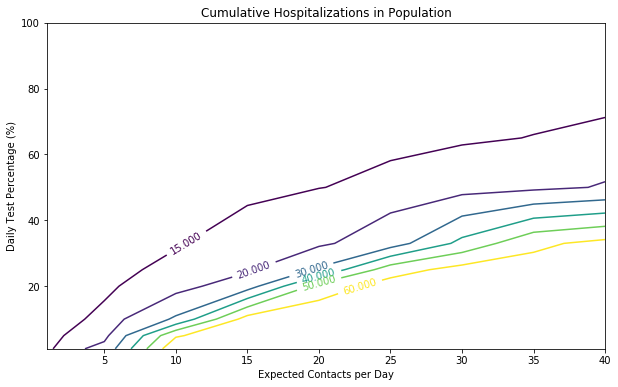

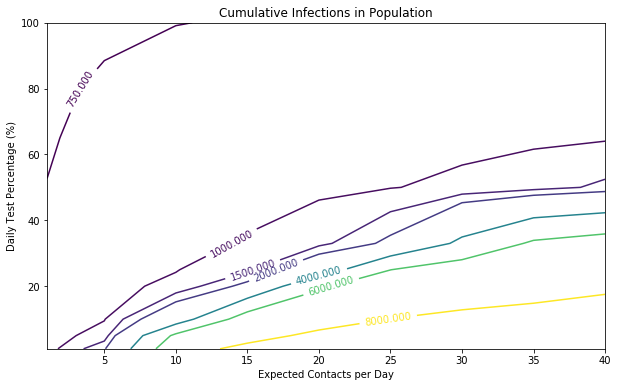

In [42]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

def get_cum_hosp(df):
    return df[['severity_3', 'severity_2']].iloc[df.shape[0] - 1].sum()

def get_cum_outside_infections(df):
    return df['cumulative_outside_infections'].iloc[df.shape[0] - 1].sum()

def get_cum_infections(df):
    return df[['cumulative_mild', 'cumulative_severe']].iloc[df.shape[0] - 1].sum()

def get_median_data(dfs):
    hosps = np.quantile([get_cum_hosp(df) for df in dfs], 0.5)
    outside_infs = np.quantile([get_cum_outside_infections(df) for df in dfs], 0.5)
    infs = np.quantile([get_cum_infections(df) for df in dfs], 0.5)
    return hosps, outside_infs, infs



Zs_hosp = []
Zs_outside_inf = []
Zs_inf = []
for contacts in X_contacts:
    
    Z_hosp = []
    Z_outside_inf = []
    Z_inf = []
    for testfrac in Y_testfrac:
#for (contacts, popsize), dfs in sensitivity_output.sim_results['Nominal Student Parameters'].items():
        dfs = sensitivity_output.sim_results['Nominal Student Parameters'][(contacts, testfrac)]
        hosps, outside_infs, infs = get_median_data(dfs)
#         hosps = [hosp + 12.47 for hosp in hosps]
#         infs = [inf + 588.54 for inf in infs]
#         print(hosps, outside_infs, infs)
        Z_hosp.append(hosps + 12.47)
        Z_outside_inf.append(outside_infs)
        Z_inf.append(infs + 588.54)
    Zs_hosp.append(Z_hosp)
    Zs_outside_inf.append(Z_outside_inf)
    Zs_inf.append(Z_inf)

plt.figure(figsize=(10,6))
plt.title("Cumulative Hospitalizations in Population")
plt.ylabel("Daily Test Percentage (%)")
plt.xlabel("Expected Contacts per Day")
# CS = plt.contour(np.array(X_contacts), np.array(Y_testfrac) * 100, np.array(Zs_hosp).T, 8)
CS = plt.contour(np.array(X_contacts), np.array(Y_testfrac) * 100, np.array(Zs_hosp).T, [15,20,30,40,50,60])
# pop_levels = [0.00025, 0.0005, 0.00075, 0.001, 0.0025, 0.005]
# pop_labels = dict()
# for level in pop_levels:
#     pop_labels[level] = str(level*100) + '%'
# CS = plt.contour(np.array(X_popsize), np.array(Y_testfrac) * 100, np.array(Zs_hosp).T/34310, pop_levels)
# plt.clabel(CS, fmt=pop_labels, inline=1, fontsize=10)
plt.clabel(CS, inline=1, fontsize=10)
plt.show()


# inf_levels = [0.025, 0.05, 0.1, 0.2, 0.3, 0.5]
# inf_labels = dict()
# for level in inf_levels:
#     inf_labels[level] = str(level*100) + '%'
    
plt.figure(figsize=(10,6))
plt.title("Cumulative Infections in Population")
plt.ylabel("Daily Test Percentage (%)")
plt.xlabel("Expected Contacts per Day")
# CS = plt.contour(np.array(X_contacts), np.array(Y_testfrac) * 100, np.array(Zs_inf).T, 8)
CS = plt.contour(np.array(X_contacts), np.array(Y_testfrac) * 100, np.array(Zs_inf).T, [750,1000,1500,2000,4000,6000,8000])
# CS = plt.contour(np.array(X_popsize), np.array(Y_testfrac) * 100, np.array(Zs_inf).T/34310, inf_levels)
# plt.clabel(CS, fmt=inf_labels, inline=1, fontsize=10)
plt.clabel(CS, inline=1, fontsize=10)
plt.show()

## Nominal Parameters No Reopen (june8params/noreopen/nominal_students_july_11_5k.yaml)
Varying Test Frequency and Contacts per day

In [43]:
sensitivity_output = MultiParamOutputLoader("/nfs01/covid_sims/1594491906-multiparam/")

In [44]:
sensitivity_output.sim_results['Nominal Student Parameters'].keys()

dict_keys([(1.0, 0.01), (5.0, 0.01), (10.0, 0.01), (15.0, 0.01), (20.0, 0.01), (25.0, 0.01), (30.0, 0.01), (35.0, 0.01), (40.0, 0.01), (1.0, 0.05), (5.0, 0.05), (10.0, 0.05), (15.0, 0.05), (20.0, 0.05), (25.0, 0.05), (30.0, 0.05), (35.0, 0.05), (40.0, 0.05), (1.0, 0.1), (5.0, 0.1), (10.0, 0.1), (15.0, 0.1), (20.0, 0.1), (25.0, 0.1), (30.0, 0.1), (35.0, 0.1), (40.0, 0.1), (1.0, 0.2), (5.0, 0.2), (10.0, 0.2), (15.0, 0.2), (20.0, 0.2), (25.0, 0.2), (30.0, 0.2), (35.0, 0.2), (40.0, 0.2), (1.0, 0.25), (5.0, 0.25), (10.0, 0.25), (15.0, 0.25), (20.0, 0.25), (25.0, 0.25), (30.0, 0.25), (35.0, 0.25), (40.0, 0.25), (1.0, 0.33), (5.0, 0.33), (10.0, 0.33), (15.0, 0.33), (20.0, 0.33), (25.0, 0.33), (30.0, 0.33), (35.0, 0.33), (40.0, 0.33), (1.0, 0.5), (5.0, 0.5), (10.0, 0.5), (15.0, 0.5), (20.0, 0.5), (25.0, 0.5), (30.0, 0.5), (35.0, 0.5), (40.0, 0.5), (1.0, 0.65), (5.0, 0.65), (10.0, 0.65), (15.0, 0.65), (20.0, 0.65), (25.0, 0.65), (30.0, 0.65), (35.0, 0.65), (40.0, 0.65), (1.0, 0.8), (5.0, 0.8), 

In [45]:
keys = sensitivity_output.sim_results['Nominal Student Parameters'].keys()
X_contacts = sorted(list(set([x[0] for x in keys])))
Y_testfrac = sorted(list(set([x[1] for x in keys])))

In [46]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

def get_cum_hosp(df):
    return df[['severity_3', 'severity_2']].iloc[df.shape[0] - 1].sum()

def get_cum_outside_infections(df):
    return df['cumulative_outside_infections'].iloc[df.shape[0] - 1].sum()

def get_cum_infections(df):
    return df[['cumulative_mild', 'cumulative_severe']].iloc[df.shape[0] - 1].sum()

def get_median_data(dfs):
    hosps = np.quantile([get_cum_hosp(df) for df in dfs], 0.5)
    outside_infs = np.quantile([get_cum_outside_infections(df) for df in dfs], 0.5)
    infs = np.quantile([get_cum_infections(df) for df in dfs], 0.5)
    return hosps, outside_infs, infs



Zs_hosp = []
Zs_outside_inf = []
Zs_inf = []
for contacts in X_contacts:
    
    Z_hosp = []
    Z_outside_inf = []
    Z_inf = []
    for testfrac in Y_testfrac:
#for (contacts, popsize), dfs in sensitivity_output.sim_results['Nominal Student Parameters'].items():
        dfs = sensitivity_output.sim_results['Nominal Student Parameters'][(contacts, testfrac)]
        hosps, outside_infs, infs = get_median_data(dfs)
#         hosps = [hosp + 12.47 for hosp in hosps]
#         infs = [inf + 588.54 for inf in infs]
#         print(hosps, outside_infs, infs)
        Z_hosp.append(hosps + 12.47)
        Z_outside_inf.append(outside_infs)
        Z_inf.append(infs + 588.54)
    Zs_hosp.append(Z_hosp)
    Zs_outside_inf.append(Z_outside_inf)
    Zs_inf.append(Z_inf)

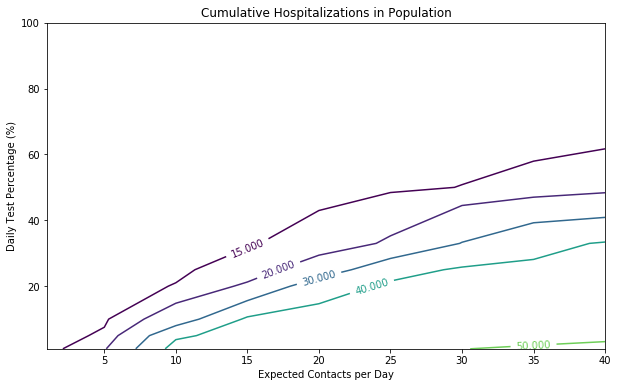

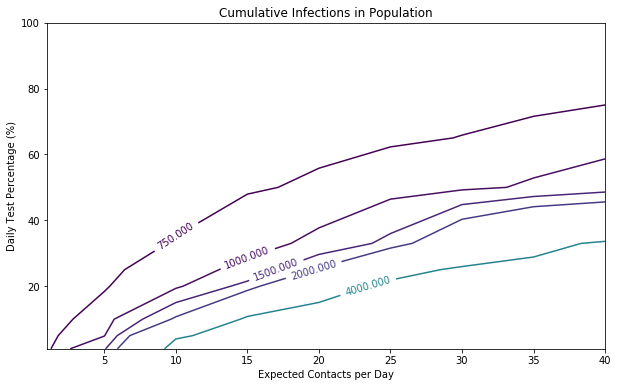

In [50]:
plt.figure(figsize=(10,6))
plt.title("Cumulative Hospitalizations in Population")
plt.ylabel("Daily Test Percentage (%)")
plt.xlabel("Expected Contacts per Day")
# CS = plt.contour(np.array(X_contacts), np.array(Y_testfrac) * 100, np.array(Zs_hosp).T, 8)
CS = plt.contour(np.array(X_contacts), np.array(Y_testfrac) * 100, np.array(Zs_hosp).T, [15,20,30,40,50,60])
# pop_levels = [0.00025, 0.0005, 0.00075, 0.001, 0.0025, 0.005]
# pop_labels = dict()
# for level in pop_levels:
#     pop_labels[level] = str(level*100) + '%'
# CS = plt.contour(np.array(X_popsize), np.array(Y_testfrac) * 100, np.array(Zs_hosp).T/34310, pop_levels)
# plt.clabel(CS, fmt=pop_labels, inline=1, fontsize=10)
plt.clabel(CS, inline=1, fontsize=10)
plt.show()


# inf_levels = [0.025, 0.05, 0.1, 0.2, 0.3, 0.5]
# inf_labels = dict()
# for level in inf_levels:
#     inf_labels[level] = str(level*100) + '%'
    
plt.figure(figsize=(10,6))
plt.title("Cumulative Infections in Population")
plt.ylabel("Daily Test Percentage (%)")
plt.xlabel("Expected Contacts per Day")
# CS = plt.contour(np.array(X_contacts), np.array(Y_testfrac) * 100, np.array(Zs_inf).T, 8)
CS = plt.contour(np.array(X_contacts), np.array(Y_testfrac) * 100, np.array(Zs_inf).T, [750,1000,1500,2000,4000,6000,8000])
# CS = plt.contour(np.array(X_popsize), np.array(Y_testfrac) * 100, np.array(Zs_inf).T/34310, inf_levels)
# plt.clabel(CS, fmt=inf_labels, inline=1, fontsize=10)
plt.clabel(CS, inline=1, fontsize=10)
plt.show()

# Old Results

## Nominal Parameters No Reopen (june8params/noreopen/nominal_students_v3.yaml)
Varying Population Size and Test Frequency

In [2]:
sensitivity_output = MultiParamOutputLoader("/nfs01/covid_sims/1594178059-multiparam/")

/home/aaj54/group-testing/src/simulations_v2/multiparam_output_loader.py:60: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  param_specifier = yaml.load(f)


In [5]:
sensitivity_output.sim_results['Nominal Student Parameters'].keys()

dict_keys([(100.0, 0.0), (100.0, 0.05), (100.0, 0.1), (100.0, 0.15), (100.0, 0.2), (100.0, 0.25), (100.0, 0.33), (100.0, 0.5), (500.0, 0.0), (500.0, 0.05), (500.0, 0.1), (500.0, 0.15), (500.0, 0.2), (500.0, 0.25), (500.0, 0.33), (500.0, 0.5), (1000.0, 0.0), (1000.0, 0.05), (1000.0, 0.1), (1000.0, 0.15), (1000.0, 0.2), (1000.0, 0.25), (1000.0, 0.33), (1000.0, 0.5), (2000.0, 0.0), (2000.0, 0.05), (2000.0, 0.1), (2000.0, 0.15), (2000.0, 0.2), (2000.0, 0.25), (2000.0, 0.33), (2000.0, 0.5), (4000.0, 0.0), (4000.0, 0.05), (4000.0, 0.1), (4000.0, 0.15), (4000.0, 0.2), (4000.0, 0.25), (4000.0, 0.33), (4000.0, 0.5), (6000.0, 0.0), (6000.0, 0.05), (6000.0, 0.1), (6000.0, 0.15), (6000.0, 0.2), (6000.0, 0.25), (6000.0, 0.33), (6000.0, 0.5), (8000.0, 0.0), (8000.0, 0.05), (8000.0, 0.1), (8000.0, 0.15), (8000.0, 0.2), (8000.0, 0.25), (8000.0, 0.33), (8000.0, 0.5), (9000.0, 0.0), (9000.0, 0.05), (9000.0, 0.1), (9000.0, 0.15), (9000.0, 0.2), (9000.0, 0.25), (9000.0, 0.33), (9000.0, 0.5)])

In [6]:
keys = sensitivity_output.sim_results['Nominal Student Parameters'].keys()
X_popsize = sorted(list(set([x[0] for x in keys])))
Y_testfrac = sorted(list(set([x[1] for x in keys])))

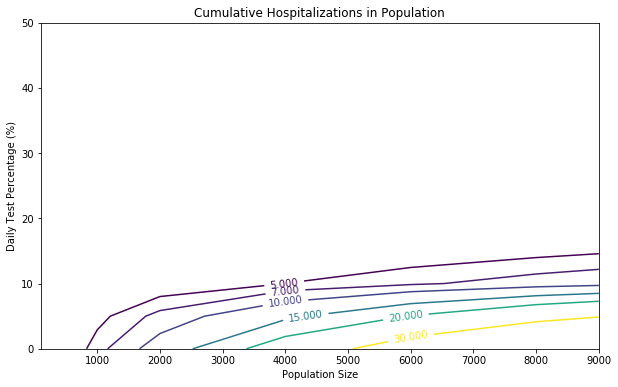

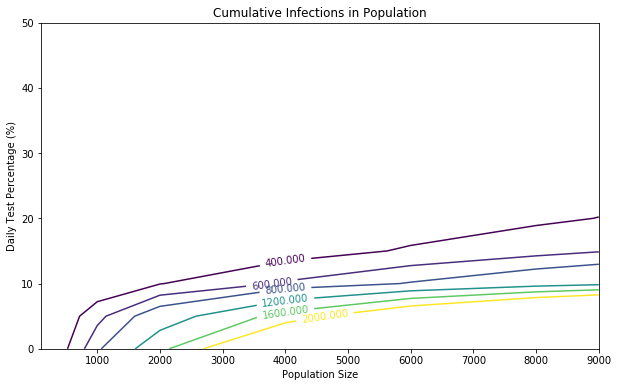

In [8]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

def get_cum_hosp(df):
    return df[['severity_3', 'severity_2']].iloc[df.shape[0] - 1].sum()

def get_cum_outside_infections(df):
    return df['cumulative_outside_infections'].iloc[df.shape[0] - 1].sum()

def get_cum_infections(df):
    return df[['cumulative_mild', 'cumulative_severe']].iloc[df.shape[0] - 1].sum()

def get_median_data(dfs):
    hosps = np.quantile([get_cum_hosp(df) for df in dfs], 0.5)
    outside_infs = np.quantile([get_cum_outside_infections(df) for df in dfs], 0.5)
    infs = np.quantile([get_cum_infections(df) for df in dfs], 0.5)
    return hosps, outside_infs, infs



Zs_hosp = []
Zs_outside_inf = []
Zs_inf = []
for popsize in X_popsize:
    
    Z_hosp = []
    Z_outside_inf = []
    Z_inf = []
    for testfrac in Y_testfrac:
#for (contacts, popsize), dfs in sensitivity_output.sim_results['Nominal Student Parameters'].items():
        dfs = sensitivity_output.sim_results['Nominal Student Parameters'][(popsize, testfrac)]
        hosps, outside_infs, infs = get_median_data(dfs)
        Z_hosp.append(hosps)
        Z_outside_inf.append(outside_infs)
        Z_inf.append(infs)
    Zs_hosp.append(Z_hosp)
    Zs_outside_inf.append(Z_outside_inf)
    Zs_inf.append(Z_inf)

plt.figure(figsize=(10,6))
plt.title("Cumulative Hospitalizations in Population")
plt.ylabel("Daily Test Percentage (%)")
plt.xlabel("Population Size")
CS = plt.contour(np.array(X_popsize), np.array(Y_testfrac) * 100, np.array(Zs_hosp).T, [5,7,10,15,20,30])
# pop_levels = [0.00025, 0.0005, 0.00075, 0.001, 0.0025, 0.005]
# pop_labels = dict()
# for level in pop_levels:
#     pop_labels[level] = str(level*100) + '%'
# CS = plt.contour(np.array(X_popsize), np.array(Y_testfrac) * 100, np.array(Zs_hosp).T/34310, pop_levels)
# plt.clabel(CS, fmt=pop_labels, inline=1, fontsize=10)
plt.clabel(CS, inline=1, fontsize=10)
plt.show()


# inf_levels = [0.025, 0.05, 0.1, 0.2, 0.3, 0.5]
# inf_labels = dict()
# for level in inf_levels:
#     inf_labels[level] = str(level*100) + '%'
    
plt.figure(figsize=(10,6))
plt.title("Cumulative Infections in Population")
plt.ylabel("Daily Test Percentage (%)")
plt.xlabel("Population Size")
CS = plt.contour(np.array(X_popsize), np.array(Y_testfrac) * 100, np.array(Zs_inf).T, [400,600,800,1200,1600,2000])
# CS = plt.contour(np.array(X_popsize), np.array(Y_testfrac) * 100, np.array(Zs_inf).T/34310, inf_levels)
# plt.clabel(CS, fmt=inf_labels, inline=1, fontsize=10)
plt.clabel(CS, inline=1, fontsize=10)
plt.show()

## No reopen, Faculty/Staff/Grad Students

In [23]:
from load_params import load_params
import numpy as np
faculty_params = load_params('../src/simulations_v2/params/june8params/noreopen/nominal_faculty.yaml')

def get_cum_hosp(df):
    return df[['severity_3', 'severity_2']].iloc[df.shape[0] - 1].sum()

def get_cum_infections(df):
    return df[['cumulative_mild', 'cumulative_severe']].iloc[df.shape[0] - 1].sum()

In [24]:
from stochastic_simulation import StochasticSimulation
sim_obj = StochasticSimulation(faculty_params[1])
sim_obj.run_new_trajectory(112)

,S,QS,QI,R,E_0,E_1,E_2,E_3,E_4,E_5,...,SyID_severe_17,SyID_severe_18,SyID_severe_19,cumulative_mild,cumulative_severe,cumulative_outside_infections,severity_0,severity_1,severity_2,severity_3
0,14986,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0
1,14979,2,4,0,0,0,2,0,0,0,...,0,0,0,5,2,2,5,1.92841,0.0516133,0.0199777
2,14963,11,8,0,1,2,3,1,1,0,...,0,0,0,6,4,5,6,3.85682,0.103227,0.0399554
3,14953,17,10,0,3,3,3,0,0,0,...,0,0,1,7,9,8,7,8.67784,0.23226,0.0898996
4,14954,13,14,0,4,3,0,1,0,0,...,0,1,0,8,10,9,8,9.64204,0.258067,0.0998885
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
108,14396,20,68,487,4,2,3,0,1,0,...,0,0,0,262,301,224,262,290.226,7.7678,3.00664
109,14391,21,66,493,2,4,1,2,0,0,...,0,0,0,263,303,226,263,292.154,7.81942,3.02662
110,14379,28,66,498,5,4,2,0,0,0,...,0,0,0,264,309,227,264,297.939,7.97426,3.08655
111,14373,28,69,499,6,3,1,0,0,0,...,0,0,0,266,314,229,266,302.76,8.10329,3.1365


In [21]:
df = sim_obj.run_new_trajectory(112)
print(get_cum_hosp(df))
print(get_cum_infections(df))

14.10342829294518
661


In [25]:
hosp_array = list()
inf_array = list()

for i in range(100):
    df = sim_obj.run_new_trajectory(112)
    hosp_array.append(get_cum_hosp(df))
    inf_array.append(get_cum_infections(df))
    
print(np.mean(hosp_array))
print(np.mean(inf_array))

12.47079538827201
588.54
